# Summary

This script is to visualize the embeddings for small groups 

In [1]:
import os
import gensim
import pickle
import time
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from spec2vec.vector_operations import calc_vector
from collections import OrderedDict, Counter
import seaborn as sns

RDKit WARNING: [15:23:30] Enabling RDKit 2019.09.3 jupyter extensions


## Compute tSNE

In [2]:
## Loading embedding arrays
with open('/mnt/scratch/ding013/MS2ChemClass/embedding_arrays_for_classification/X_spectral_embeddings.csv') as file_name:
    X_embedding = np.loadtxt(file_name, delimiter=",")
print(X_embedding.shape)

(16360, 300)


In [3]:
import csv

with open('/mnt/scratch/ding013/MS2ChemClass/embedding_arrays_for_classification/y_cf_subclass_labels.csv') as file_name:
    csv_label = csv.reader(file_name)
    y_label_list = []
    for row in csv_label:
        y_label_list.append(row[0])
y_label = np.array(y_label_list)
print(y_label.shape)

(16360,)


In [5]:
# select smaller groups with size 4-10
lbs = Counter(y_label)
lbs = {k:v for k,v in sorted(lbs.items(), key=lambda item: item[1], reverse=True)}
sel_index = list(lbs.values()).index(3) # find the first index whose values just smaller than 4
sel_index2 = list(lbs.values()).index(10)
select_lbs = list(lbs.keys())[sel_index2:sel_index]

print(len(select_lbs))
select_indices = [i for i,x in enumerate(y_label) if x in select_lbs]


114


In [8]:
print(len(select_indices))

701


In [14]:
spectrum_vectors = np.array([X_embedding[i,:] for i in select_indices])
print(spectrum_vectors.shape)
sel_class = [y_label_list[i] for i in select_indices]

(701, 300)


In [12]:
spectrum_vectors = np.vstack(spectrum_vectors)

In [13]:
from sklearn.manifold import TSNE
tsne_2d_w = TSNE(n_components=2, random_state=42)
tsne_2d_w_res = tsne_2d_w.fit_transform(spectrum_vectors)

In [16]:
# assign a colour to each collapsed class in order
nice_colours = ['#E6194B', '#3CB44B', '#FFE119', '#4363D8', '#F58231',
                '#911EB4', '#46F0F0', '#F032E6', '#BCF60C', '#FABEBE',
                '#008080', '#E6BEFF', '#9A6324', '#FFFAC8', '#800000',
                '#AAFFC3', '#808000', '#FFD8B1', '#000075', '#808080',
                '#000000']  # black last -> this will be the other/unclassified colour
len(nice_colours)
tsne_palette = sns.set_palette(sns.color_palette(nice_colours))

colour_dict = OrderedDict([(cl,nice_colours[min([i,len(nice_colours)-1])]) for i, cl in enumerate(select_lbs)])

print(colour_dict)
# edit original classes list so each spectrum has collapsed class
#chosen_classes = [d_collapsed_classes.get(c_cl, uncl_other) for c_cl in chosen_classes_ori]
#spectra_chosen_classes = [colour_dict[c_cl] for c_cl in chosen_classes]  # get colour for each spec for matplotlib
#Counter(chosen_classes_ori_ui).most_common(), Counter(chosen_classes_ori).most_common(), Counter(chosen_classes).most_common()

OrderedDict([('Benzofuranones', '#E6194B'), ('Thiazoles', '#3CB44B'), ('Isobenzofuranones', '#FFE119'), ('Phenanthrols', '#4363D8'), ('Pyridazines and derivatives', '#F58231'), ('Halopyridines', '#911EB4'), ('Bipyridines and oligopyridines', '#46F0F0'), ('Naphthols and derivatives', '#F032E6'), ('Pterins and derivatives', '#BCF60C'), ('Benzylamines', '#FABEBE'), ('Benzothiadiazines', '#008080'), ('Aspochalasins', '#E6BEFF'), ('Phenylcarbamic acid esters', '#9A6324'), ('Glycerophosphates', '#FFFAC8'), ("Purine 2'-deoxyribonucleosides", '#800000'), ('Fatty alcohol esters', '#AAFFC3'), ('Glycosylglycerols', '#808000'), ('N-acylpiperidines', '#FFD8B1'), ('Indanones', '#000075'), ('Stigmastanes and derivatives', '#808080'), ('1-hydroxy-4-unsubstituted benzenoids', '#000000'), ('Triazoles', '#000000'), ('Indazoles', '#000000'), ('Cinnamic acid amides', '#000000'), ('Pyranoflavonoids', '#000000'), ('Isoflavonoid C-glycosides', '#000000'), ('Hydroxyflavonoids', '#000000'), ('Pyrimidine ribonuc

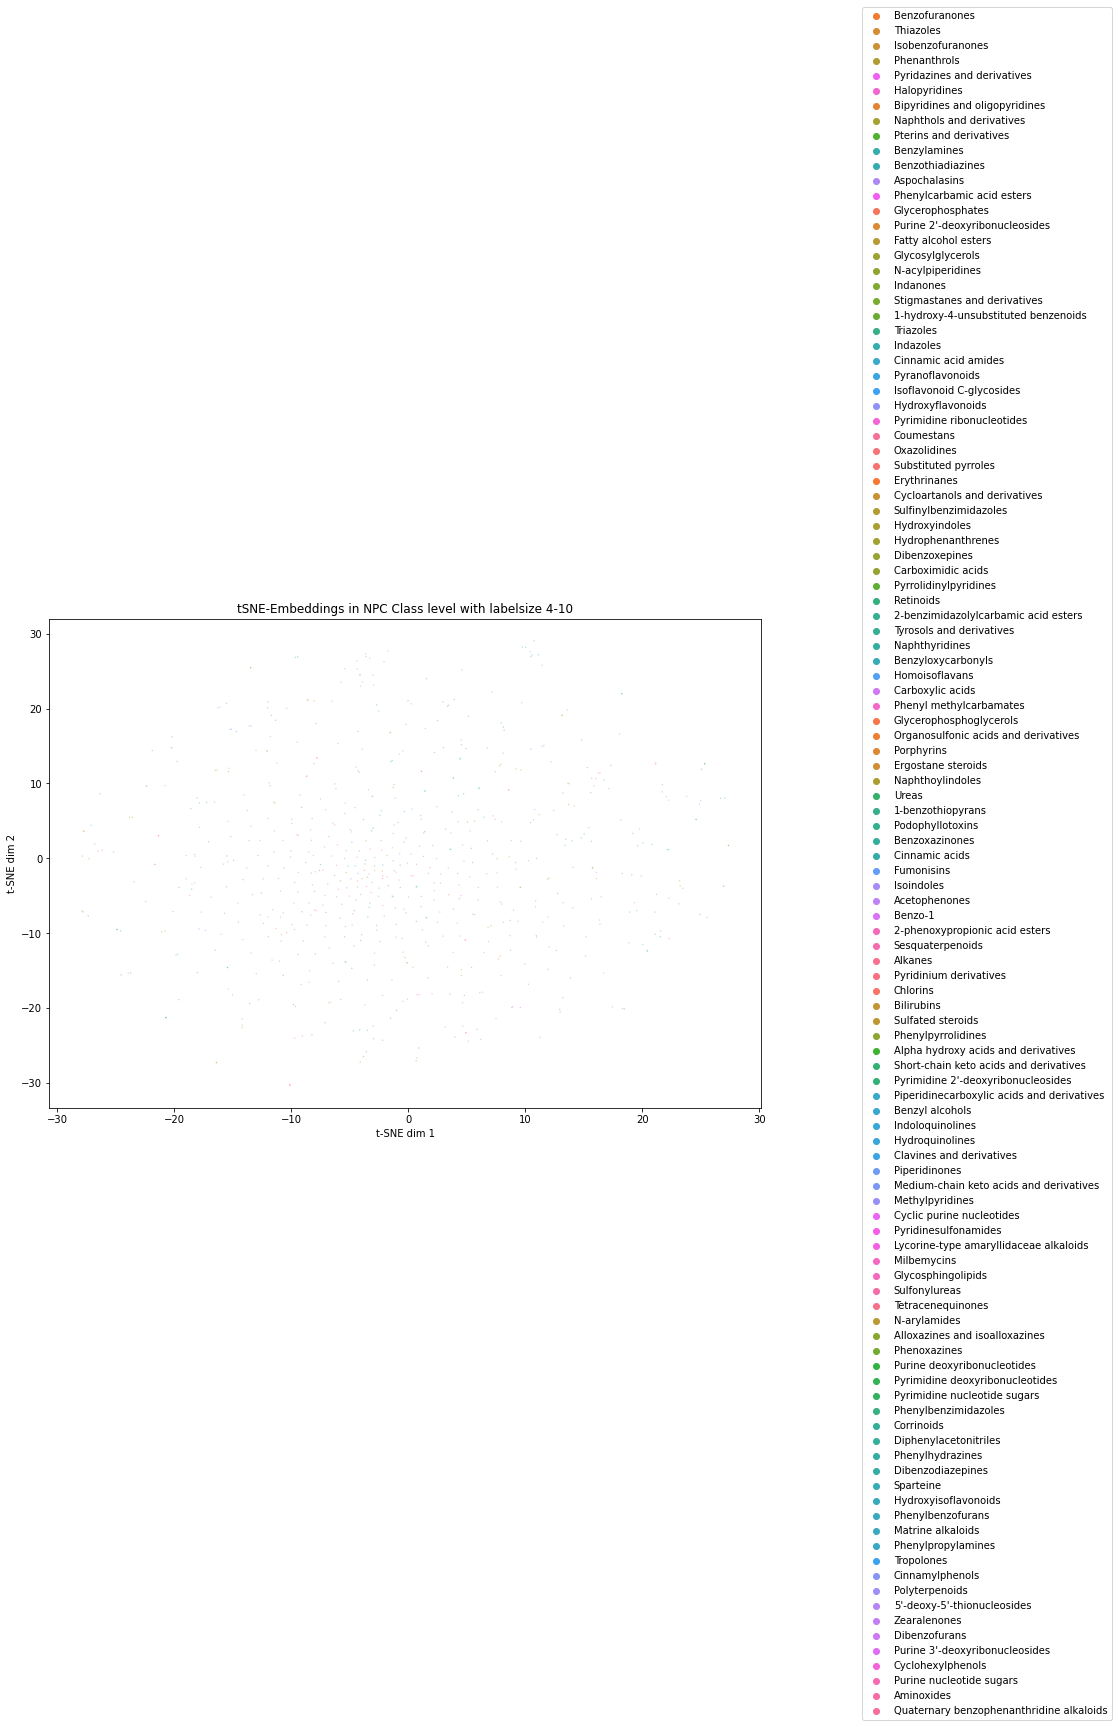

In [22]:

#print("Showing classes for:", sel_class)
plt.figure(figsize=(15,9))
ax = sns.scatterplot(
    x=tsne_2d_w_res[:,0], y=tsne_2d_w_res[:,1],
    hue=sel_class,
    legend="full", alpha=0.4, s=2) #adjust dot size

ax.set(xlabel='t-SNE dim 1', ylabel='t-SNE dim 2',
       title='tSNE-Embeddings in NPC Class level with labelsize 4-10')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.85, box.height]) # resize position

# Put a legend to the right side
handles, labels = ax.get_legend_handles_labels()
by_label_unsorted = dict(zip(labels, handles))
by_label = OrderedDict([(lab,by_label_unsorted[lab]) for lab in colour_dict.keys()])
ax.legend(by_label.values(), by_label.keys(), loc='center right', bbox_to_anchor=(1.5, 0.5), ncol=1)
# ax.legend()
#plt.savefig(os.path.join(save_path)
plt.show()

In [18]:
print(sns.color_palette("Set2"))

[(0.4, 0.7607843137254902, 0.6470588235294118), (0.9882352941176471, 0.5529411764705883, 0.3843137254901961), (0.5529411764705883, 0.6274509803921569, 0.796078431372549), (0.9058823529411765, 0.5411764705882353, 0.7647058823529411), (0.6509803921568628, 0.8470588235294118, 0.32941176470588235), (1.0, 0.8509803921568627, 0.1843137254901961), (0.8980392156862745, 0.7686274509803922, 0.5803921568627451), (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]
